# Working with Text

Text is a huge source of data; it's in books, reports, social media, and transcriptions
of speech. We can use data science in several different ways with text data to
extract useful information and hidden patterns `Natural Language Processing`.


Of course, we need to turn our text into numbers to be able to process it
with most machine learning and analytics tools, adding another step to the process.

The following is covered here:
- Basic text preprocessing and cleaning, including TFIDF and word vectors
- Text analytics such as word counts and word collocations
- Unsupervised learning for text analysis, including topic modeling
- Supervised learning (classification) with text
- Sentiment analysis



## Text Preprocessing

Before we undertake text analysis, it's often helpful to undertake some common
cleaning and preprocessing steps. This includes:

- Lowercasing
- Removing Punctuation, whitespaces, and numbers
- Removing other specific patterns (emails)
- Removing Stop Words
- Stemming and Lemmatization


Cleaning and preparing text can improve the performance of ML algorithms as well
as make it easier to understand the results of analysis.

In [1]:
# Basic Text Cleaning

from urllib.request import urlopen

from gutenberg_cleaner import simple_cleaner


# Get the text from the Web Page
web_page = 'https://www.gutenberg.org/files/2600/2600-0.txt'

wnp = urlopen(web_page).read().decode('utf-8')

# Clean the text and lowercase the text
wnp = simple_cleaner(wnp).lower()

# Show the first 100 characters
wnp[:100]

'\r\n\r\n\r\n\r\nwar and peace\r\n\r\n\r\nby leo tolstoy/tolstoi\r\n\r\n\r\n    contents\r\n\r\n    book one: 1805\r\n\r\n    cha'

Lowercasing helps standardize our words for analysis such as word counts and
other processing steps. One disadvantage of lowercasing is proper nouns may not be
recognized correctly and are not distinguished from regular nouns. Handling entities
and proper nouns requires more sophisticated techniques, such as using the `spaCy`

In [2]:
# Dealing with excess whitespace

import re

wnp = re.sub(r'\s+', ' ', wnp).strip()


The re.sub function takes a pattern, a string to replace the pattern with, and a
string to substitute on. We use \s+ to find one or more occurrences of spaces, then
replace them with a single space in the wnp string. Lastly, we use strip() to remove
whitespace at the beginning and end of the string. Our first hundred characters
(wnp[:100]) now look like:

In [3]:
wnp[:100]

'war and peace by leo tolstoy/tolstoi contents book one: 1805 chapter i chapter ii chapter iii chapte'

In [4]:
# Removing Punctuation
import string

wnp = wnp.translate(str.maketrans('', '', string.punctuation))

We use the built-in string module to get a string of common punctuation. Then we
use the string method translate along with str.maketrans to replace punctuation
with nothing, removing it.

This is similar to using regex or regular expressions (the re package), although we
are using built-in Python functions here. The maketrans function can take up to three
arguments and is described in its documentation in more detail. When we provide
three arguments, each unique character in the last argument is mapped to None,
removing these characters from the original string we used with translate.

If we wanted to include more characters to remove, such as numbers, we could
simply use string.punctuation + string.digits as the third argument to
str.maketrans.

In [5]:
# Removing email patterns

wnp = re.sub(r'\w+\w+\.\w+', '', wnp)

The \w pattern specifies any alphanumeric character (letters and numbers as well
as the underscore character), and the + means match one or more of the proceeding
pattern. The \. means a literal period. Usually, a period is a wildcard character that
matches anything, so we need to "escape" it with the backslash. Put together, this
pattern looks for one or more alphanumeric characters, then the @ symbol, another
set of alphanumeric characters, a period, and more alphanumeric characters. We
then replace this with an empty string, removing any common email addresses.

In [6]:
# Removing Stopwords

from sklearn.feature_extraction import _stop_words


non_stopwords = []

for word in wnp.split():
    if word not in _stop_words.ENGLISH_STOP_WORDS:
        non_stopwords.append(word)
        

cleaned_text = " ".join(non_stopwords)

cleaned_text[:100]

'war peace leo tolstoytolstoi contents book 1805 chapter chapter ii chapter iii chapter iv chapter v '

We loop through each word (split on spaces with split()), then add it to the non_
stopwords list if it's not one of the stop words. When we split the text into words, the
individual words are usually called tokens, and the processing of splitting text into
tokens is called tokenization. Finally, we join our list of words back together with
spaces between the words to get a single string again.

The _stop_words.ENGLISH_STOP_WORDS variable is a set. Other stop word lists (like
NLTKs) are lists, and it's best to convert them into a set before doing something
like the above code example. That's because when we check if a string is in a list of
strings, it checks for a match against each element in the list one at a time. If we use
a set instead of a list, Python instantly checks if the string we're searching for is in
the set, and this is more efficient due to hashing (converting input data into a unique
number or alphanumeric combination). Examining the stop word set shows all the
words are lowercased and have no punctuation. Depending on if the stop word list
has punctuation, you should be careful to remove punctuation before or after you
remove stop words.

## Stemming and Lemmatization

Our last step is stemming or lemmatizing. Stemming is cutting off the end of a word
(the suffix) to get the root. There are a few different algorithms available for this
from the NLTK package, which we need to ensure is installed with conda or pip first.
We will use the Snowball stemmer, although there are several options to use for
a stemmer:

- Porter stemmer: the original stemmer from 1980 and the least aggressive of the stemmers listed here (words are not shortened too much and the resulting stems are usually understandable)
- Snowball (also called Porter2) stemmer: makes some improvements upon the Porter stemmer and is generally considered better than the Porter stemmer (other languages besides English are supported as well)
- Lancaster stemmer: a more aggressive stemmer that may give strange results but can trim words to shorter lengths
- Non-English stemmers, like ISRI (Arabic) and RSLP (Portuguese)

`The NLTK documentation also has a good explanation of basic stemming, and we can see the different languages available for the Snowball stemmer: https://www.nltk.org/howto/stem.html.`

In [7]:
from nltk.stem import SnowballStemmer

stemmer = SnowballStemmer('english')

stemmed_words = []

for word in cleaned_text.split():
    stemmed_words.append(stemmer.stem(word))
    
stemmed_text = ' '.join(stemmed_words)

We first initialize our stemmer for English, then use a similar loop to our stop words loop above. In fact, we could check for stop words and stem words in the same loop to be more efficient. Let's take a section from the War and Peace book and see how our cleaning and pre-processing steps so far affect it. We'll use the passage:

`“I knew you would be here,” replied Pierre. “I will come to supper with you. May I?” he added in a low voice so as not to disturb the vicomte who was continuing his story.`

Note that curly quotes were included with our punctuation removal using cleaned_string = cleaned_string.translate(str.maketrans('', '', string.punctuation+ '“”')). Our result after cleaning and stemming is:

`knew repli pierr come supper ad low voic disturb vicomt continu stori`

We can see things like "continuing" have been shortened to "continu" and stop words have been removed from our cleaning and pre-processing steps. Clearly, we can see some of the stems of words are difficult to interpret, but this will help us group similar words for analysis such as word counts. The drawback of stemming is words can look a little strange and can be hard to interpret (such as repli instead of reply).

Another option is to use lemmatization instead of stemming. This reduces words
to their root in a different way and usually ends up with words being in a more
recognizable form. However, lemmatization requires us to know the part of speech
(POS) of a word, such as noun, verb, adjective, and so on. One way to carry out
lemmatization is to use the WordNetLemmatizer from NLTK. However, this requires
us to first do POS tagging, and the NLTK lemmatizer assumes all words are nouns
by default (which is not correct and results in incorrect lemmatization). An easier
way to perform lemmatization is to use the spaCy package, which we can use for
the full suite of cleaning we just described as well.

## Preparing Text with Spacy

spaCy is an NLP package in Python with a wide range of capabilities. It can clean text, perform lemmatization, extract entities (such as people or places), perform POS tagging, and convert text into vectors (such as word, sentence, or document vectors).

We'll look at using spaCy in a simple Python function to clean our text
and lemmatize it. First, we need to install spacy with conda or pip. We then need to
install a language model, which contains information about the language, such as
stopword lists, word vectors, and more. For a simple English model, we can run the
following command from the command line: `python -m spacy download en_core_web_sm`. There are many more language models available and described in the spaCy
documentation: https://spacy.io/usage/models.


In [8]:
import spacy

spacy_en_model = spacy.load('en_core_web_sm', disable=['parser', 'ner'])
spacy_en_model.max_length = 4000000

def clean_text_spacy(text):
    processed_text = spacy_en_model(text)
    lemmas = [w.lemma_ if w.lemma_ != '-PRON-' else w.lower_ for w in processed_text if w.is_alpha and not w.is_stop]
    return ' '.join(lemmas).lower()
    
    
wnp = urlopen(web_page).read().decode('utf-8')


wnp = simple_cleaner(wnp)

lemmatized_text = clean_text_spacy(wnp)

First, we import spacy and load the small English model. We turn off the parser
and named entity recognition (NER) with the disable argument in spacy.load().
The parser and NER can take a lot of memory and processing power to run, so
disabling these parts of the spaCy pipeline speeds up the process significantly. The
vectorizer (tok2vec) allows us to get word vectors for each word, but also needs extra
processing time and memory. For some reason, disabling the vectorizer causes the
lemmatization to not work properly, so we leave it enabled.


After we've disabled some parts of the pipeline for efficiency, we then increase
the max length of our model from the default of 1,000,000 to 4,000,000. Our text is
around 3.2 million characters, which exceeds the default max length. Long texts can
take a lot of memory and time to run if we are using the parser and NER, but since
we disabled them here, it doesn't matter as much.

Next, we get into the function. We first process the text with our language model
using spacy_en_model(text). Then we use a list comprehension to go through each
token in our processed text. We get the text version of the lemma with w.lemma_ if it
exists, or if the word is a pronoun (represented as '-PRON-' by spacy), then we use
the lowercased version of the word. We also only keep alphanumeric words and
words that are not stop words by using if w.is_alpha and not w.is_stop. Finally,
we join our lemmatized and cleaned words back together into a single string and
return it, storing it in the lemmas variable.


We use the function by first re-downloading War and Peace and cleaning the header
and footer, then using our clean_text_spacy function. Again, let's look at the effect
on our sample chunk of text:

`“I knew you would be here,” replied Pierre. “I will come to supper with you. May I?” he added in a low voice so as not to disturb the vicomte who was continuing his story.`

After using spacy to clean and pre-process it, the lemmatized results are:

`'know reply pierre come supper add low voice disturb vicomte continue story'`

For an easy comparison, here are the results of our other cleaning and pre-processing pipeline, which used stemming:

`knew repli pierr come supper ad low voic disturb vicomt continu stori`

We can see the words are easier to read and understand in general with
lemmatization (such as reply versus repli), and it handled the curly quotes. spaCy
also keeps special characters such as letters with accents. In general, this might take
slightly longer than stemming because it needs to tag the parts of speech before
lemmatizing. However, it generally gives results that are easier to interpret. If we
don't have a large amount of text to process or have good computing resources at
our disposal, it's better to leave all the pipeline steps enabled instead of disabling
NER and the parser as we did here.


## Word Vectors

As we saw in the spacy pipeline, we can get token or word vectors. Sometimes
these are called word or text embeddings. These are mappings of words to series
of numbers (a vector) that represent the semantic meaning of the word. Several
different sets of word vectors have been generated, and many of them are generated
with a neural network model that tries to predict nearby words in a huge volume of
text like Wikipedia.

A more advanced way to get word embeddings that can distinguish contextual
meaning even better are neural network models like `BERT` or `ELMO`. However,
with `BERT` and `ELMO`, we must pass our text through the model to generate the
embeddings instead of simply using a lookup dictionary.

We can get word vectors easily in a few ways in Python:
- The Gensim package (https://radimrehurek.com/gensim/models/word2vec.html)
- The spaCy package (https://spacy.io/usage/linguisticfeatures#vectors-similarity)
- The fasttext package (https://github.com/facebookresearch/fastText)
- Using GloVe, Word2Vec, or other vectors (http://vectors.nlpl.eu/repository/)
- This can be made easier with Python packages such as the word-vectors package

We'll look at using spacy since we already have it ready to go. To get word vectors
from spaCy we should download a larger model such as the medium or large
model (md or lg), which has the most complete set of word vectors: python -m spacy
download en_core_web_md. spaCy uses its own word vectors from its own trained
model.

`The way some of the word vector sets are generated are by using skip-gram or continuous bag-of-words (CBOW) models. There
are many resources for learning more about this, for example, here:
https://towardsdatascience.com/nlp-101-word2vec-skipgram-and-cbow-93512ee24314`

In [9]:
import spacy

import en_core_web_lg

# spacy_en_model = spacy.load('en_core_web_lg', disable=['parser', 'ner'])

# Remember to disable the parser and NEW to save memory
spacy_en_model = en_core_web_lg.load(disable=['parser', 'ner'])

spacy_en_model.max_length = 4000000

processed_text = spacy_en_model(wnp)

In [10]:
# Apply model to text

for word in processed_text[:5]:
  print(f"Word Text --> {word.text}, Word Vector --> {word.vector}\n")

Word Text --> 



, Word Vector --> [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]

Word Text --> WAR, Word Vector --> [-3.0730e-01 -

Each word has its own vector, which is accessible with the vector attribute. We can
also get a vector for the entire document with processed_text.vector. This takes
the average of all word vectors in the document, which can actually work well for
applications like classification and topic modeling.

Word vectors are a new technique since the computational power and easily
accessible datasets to create them haven't existed for very long. An older
technique that has been around and used for a while is TFIDF vectors.

## TFIDF Vectors

TFIDF stands for term frequency inverse document frequency and describes what
these vectors are – the term frequency of words (calculated separately for each
document) multiplied by the inverse document frequency of words.

In other words,
the term frequency is simply word counts and the inverse document frequency is
1 divided by the number of documents in which a word is present. With TFIDF,
we get a series of numbers for each document in a group of documents we might
have. For example, let's look at the 20 newsgroups dataset available in sklearn.

In [11]:
# Documents from sklearn for text classification example

from sklearn.datasets import fetch_20newsgroups

from sklearn.feature_extraction.text import TfidfVectorizer

# This loads a dictionary into newsgroups_train, with the text as a list under 
# the key 'data' and remove boilerplate words
newsgroups_train = fetch_20newsgroups(remove=('headers', 'footers'))

# Using the TFIDF Vectorizer
tfidf_vectorizer = TfidfVectorizer()

ng_train_tfidf = tfidf_vectorizer.fit_transform(newsgroups_train['data'])

The vectorizer has several arguments that can be used to customize behavior.
Generally, it's not a bad idea to clean our data before passing it to the vectorizer, but
it lowercases text by default (with the argument lowercase=True as default) and can
remove stop words if we provide a list to the stop_words argument. We can also use
the string 'english' for the stop_words argument to use sklearn's stop word list,
although the sklearn documentation recommends against this. Additionally, we
can adjust the number of included words with the max_df, min_df, and max_features
arguments. If we set the min_df argument to a higher value (its default is 1), this
will only include words that appear in at least that many documents. This will
trim rare words (for example, typos, slang, or jargon) that likely won't help us in
further analysis. It can reduce the size of our TFIDF matrix and can result in faster
runtimes for further analysis. The max_df argument works in the same manner but
limits the maximum document frequency for terms. The max_features argument
causes the vectorizer to only retain the top number of features we specify, ordered
by term frequency. One other useful option is to change the n-gram range with the
ngram_range parameter. This is a tuple that we can use to set the size of n-grams
to be included (1,1) by default.We could
only include bigrams (word pairs, or 2-grams) with (2, 2), or include different
n-grams with other combinations (such as 1- and 2-grams with (1, 2)).

## Basic Text Analysis

The first step in analysis is to explore the data. Common exploratory data analysis
(EDA) with text includes frequency and TFIDF bar plots as well as plots of word
counts. We'll also look at Zipf's law, word collocations, and analyzing the POS tags
from our data in this section.


### Word Frequency Plots



In [12]:
# Cleaning data with Spacy

import pandas as pd
import swifter
# Convert to Pandas DF
ng_train_df = pd.DataFrame({'text': newsgroups_train['data'],
                            'label': newsgroups_train['target']
                            })
# Apply the spacy cleaning function with swfter module for parrallelization
ng_train_df['text'] = ng_train_df['text'].swifter.apply(clean_text_spacy)

# use our TFIDF vectorizer with a minimum
# document frequency of 10 to exclude rare words and a maximum of 0.9 to exclude
# words that show up too often.
tfidf_vectorizer = TfidfVectorizer(min_df=10, max_df=0.9)

ng_train_tfidf = tfidf_vectorizer.fit_transform (ng_train_df['text'])

Pandas Apply:   0%|          | 0/11314 [00:00<?, ?it/s]

This TFIDF method and averaging the word vectors for a document can be called
a bag-of-words (BoW) methodology, since we are taking unordered words in
our feature extraction. In other words, we are using the words from our data as
a multiset (a set, but incorporating the number of counts of each item), but with
BoW we are not paying attention to their order or grammar. If we were to use
other methods like some neural network models where the order of words matters,
it would no longer be using a BoW methodology. Once we have some basic
preprocessing done on our text, we can begin to analyze it.

## Basic Text Analysis

The first step in analysis is to explore the data. Common exploratory data analysis
(EDA) with text includes frequency and TFIDF bar plots as well as plots of word
counts. We'll also look at Zipf's law, word collocations, and analyzing the POS tags
from our data in this section.


### Word Frequency Plots
A simple way to explore data is with a word frequency or word count plot. There are
a few ways to generate this: we could use the CountVectorizer from sklearn, NLTK's
FreqDist, pycaret, and more.

In [13]:
# !pip install pycaret
from pycaret.nlp import setup, plot_model

nlp_setup = setup(newsgroups_train['data'], custom_stopwords=['ax', 'edu', 'com', 'write'])

plot_model(model=None, plot='frequency')

Description,Value
session_id,4143
Documents,11314
Vocab Size,40619
Custom Stopwords,True


With 'frequency' as the second argument, we plot unigram frequencies, though
there are many other options for plotting such as bigrams, trigrams, and more
(described in the documentation: https://pycaret.org/plot-model/). A drawback
of pycaret is that it doesn't allow fine-tuning of the cleaning process. However, pycaret will
still lemmatize words with spacy and perform other cleaning and analysis steps for
us even if the data is pre-cleaned.

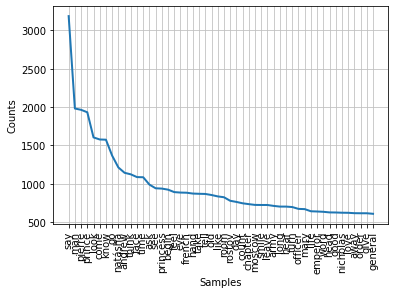

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [14]:
from nltk import FreqDist

# Unigram plot with nltk
fd = FreqDist(lemmatized_text.split())

fd.plot(50)

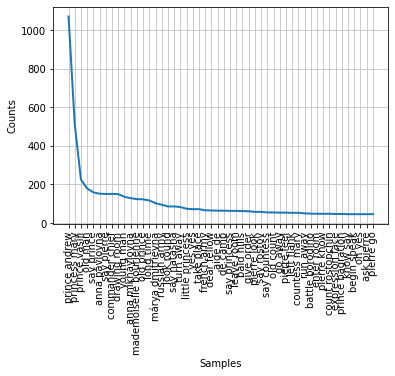

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [15]:
# Diagram plot with nltk

from nltk import bigrams

fd_bag = FreqDist(map(' '.join, bigrams(lemmatized_text.split())))

fd_bag.plot(50)

We can see the top characters are mentioned quite often, and Pierre appears to be
speaking a lot in the book. It seems some common phrases are repeated often as well,
such as "long time" and "look round." Remember these are cleaned and lemmatized
text, so "look round" may result from "looking round" or something similar.


If we set the plot argument of fd_bg.plot() to False, we can modify the plot before
displaying it. The plot function returns a matplotlib.axes object, and we can modify
that to change the style or look of the plot if we wish. We can also use other methods
with a little more elbow grease to make nicer-looking plots, such as Python's built-in
Counter or sklearn's CountVectorizer methods

Text(0, 0.5, 'TF-IDF')

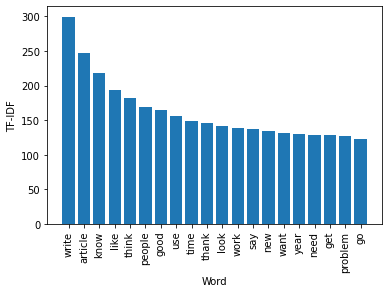

In [16]:
import matplotlib.pyplot as plt
import numpy as np


idx_to_word = {v: k for k, v in tfidf_vectorizer.vocabulary_.items()}


num_words = 20

tfidf_sum = np.asarray(ng_train_tfidf.sum(axis=0)).flatten()

sorted_idx = tfidf_sum.argsort()[::-1]

tfidf_sum = tfidf_sum[sorted_idx]


xticks = range(num_words)

plt.bar(xticks, tfidf_sum[:num_words])

plt.xticks(xticks, [idx_to_word[i] for i in sorted_idx[:num_words]], rotation=90)

plt.xlabel('Word')

plt.ylabel('TF-IDF')

In the example above, we first create a dictionary mapping the index (column
number in the ng_train_tfidf numpy array) to each vocabulary item (word, or
1-gram in our case). This requires us to reverse the built-in vocabulary_ dictionary,
which we do using a dictionary comprehension. Then, we get the sum of the TFIDF
vectors across each word (the sum of each column, using axis=0). This creates a
numpy matrix, so we convert it to an array, then flatten it (removing the extraneous
singlet dimension, since the shape is (1, 8714)). Next, we get the sorted index of
our TFIDF sums from greatest to least with argsort and reverse it with [::-1]. We
index our tfidf_sum variable by this, then create a list for our x-axis ticks. We have
a variable, num_words, that we can use to adjust the number of words we show on the
plot. Finally, we can plot it by providing the x-axis tick values and TFIDF sums, and
setting the x-axis tick labels with plt.xticks.

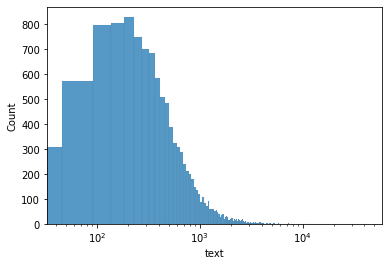

In [17]:
import seaborn as sns


sns.histplot(ng_train_df['text'].apply(lambda x: len(x)))
plt.xscale('log')

## Wordcloud 

It is possible to create wordclouds with the wordcloud package in Python.
Wordclouds are visualizations of word frequencies where the size of the word
is proportional to the frequency of the word. However, many people despise
wordclouds, and they have even been called "the mullets of the internet" because
they can look tacky and are often misused. Wordclouds can be used occasionally as
an aesthetic addition to a presentation or web page, but for analysis they are difficult
to interpret. It's much better to use a word frequency bar plot as we showed above.

## Zipf's Law


Interestingly, the word frequency in large texts tends to follow a specific distribution.
Not only does it show up in text, but in other situations with ranked order as well,
such as the population of cities. You can see some of the situations where this shows
up on the Zipf's Law Wikipedia page (https://en.wikipedia.org/wiki/Zipf%27s_law#Other_data_sets) as well as this entertaining video (https://www.youtube.com/watchv=fCn8zs912OE). This distribution is called Zipf's law.



In [18]:
from sklearn.feature_extraction.text import CountVectorizer


def get_top_grams(docs, n=2):
    v = CountVectorizer(ngram_range=(n, n))
    grams = v.fit_transform(docs)
    gram_sum = np.array(np.sum(grams, axis=0)).flatten()
    gram_dict = {i: v for v, i in v.vocabulary_.items()}
    top_grams = gram_sum.argsort()[::-1][:-1]
    
    return [gram_dict[i] for i in top_grams], gram_sum[top_grams]




First, the function we are creating takes in a list of documents and an n-gram value,
then performs a process that's similar to what we did with the TFIDF plot. We get
n-gram counts with CountVectorizer, then get the list of n-grams and their ranked
frequencies from greatest to least. We can get this for a few different n-gram values
like so:

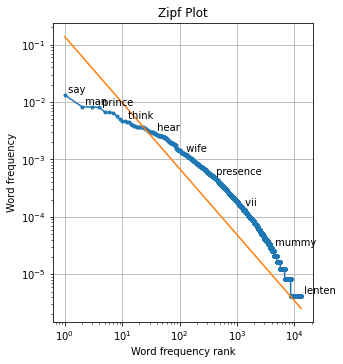

In [19]:
from scipy.stats import zipf 


ngrams, ngram_counts = {}, {}


for n in range(1, 4):
    ngrams[n], ngram_counts[n] = get_top_grams([lemmatized_text], n=n)
    
    
    
# Plot the Zipf Plot

def make_zipf_plot(counts, tokens, a = 1.15):
    ranks = np.arange(1, len(counts) + 1)
    indices = np.argsort(-counts)
    normalized_frequencies = counts[indices] / sum(counts)
    
    f = plt.figure(figsize=(5.5, 5.5))
    plt.loglog(ranks, normalized_frequencies, marker=".")
    
    plt.loglog(ranks, [z for z in zipf.pmf(ranks, a)])
    
    plt.title("Zipf Plot")
    plt.xlabel("Word frequency rank")
    plt.ylabel("Word frequency")
    
    ax = plt.gca()
    ax.set_aspect('equal') # make the plot square
    plt.grid(True)
    
    # add text labels
    last_freq = None
    labeled_word_idxs = list(np.logspace(-0.5, np.log10(len(counts) - 1), 10).astype(int))
    
    for i in labeled_word_idxs: 
        dummy = plt.text(ranks[i],
                        normalized_frequencies[i], 
                        " " + tokens[indices[i]],
                        verticalalignment="bottom", 
                        horizontalalignment="left")
    
    plt.show()
    
    
make_zipf_plot(counts = ngram_counts[1], tokens = ngrams[1])

We can see the distribution almost follows the ideal Zipf law line, but deviates
somewhat. Words that are top ranked appear less frequently than we'd expect, but
the rest of the words appear more frequently than we might expect. This may have
to do with the writing style and the fact this text was translated from Russian to
English. We also usually don't see a perfect match to the Zipf line from text. The
Zipf profile of writing can be used as one of many features to help identify authors
(this could be based on the characteristics of the Zipf plot of an author's writings, but
we would want to use other measures, such as counts of words with different POS
tags). We can also plot bigrams with make_zipf_plot(ngram_counts[2], ngrams[2],
a=1.01). Notice that we adjusted the shape parameter for the Zipf distribution here
to 1.01 from 1.15 that we used for unigrams.

## Word Collocations

Another interesting way to explore text data is with collocations, which are
combinations of words that are statistically unique. One way of measuring a word
collocations statistical importance is by the ratio of the co-occurrence of a few words
(for example, when two words appear next to each other) to the separate occurrence
of each word. This is called pointwise mutual information, or PMI. If two words in
the text mostly show up as bigrams but don't show up much by themselves, that's
an interesting word pair. For example, the two words "of the" are very common and
don't always appear together. However, the two words "New York" are not very
common and tend to appear together. So "New York" would have a high PMI or
other collocation statistic value, while "of the" would be a low value. We can extract
these collocation values with the NLTK package:

In [20]:
from nltk.collocations import BigramAssocMeasures, BigramCollocationFinder



BigramCollocationFinder.from_words(lemmatized_text.split()).nbest(BigramAssocMeasures().pmi, 10)

[('ab', 'ovo'),
 ('absorbed', 'querulousness'),
 ('academy', 'jotting'),
 ('achtung', 'nehmen'),
 ('agwee', 'evewythe'),
 ('ahahah', 'rrrr'),
 ('alliée', 'sincère'),
 ('alliés', 'détruite'),
 ('alphonse', 'kárlovich'),
 ('amber', 'mouthpiece')]

In [21]:
# from nltk.collocations import score_ngrams

# Obtain the PMI score 

BigramCollocationFinder.from_words(lemmatized_text.split()).score_ngrams(BigramAssocMeasures().pmi)[:15]

[(('ab', 'ovo'), 17.872446435470106),
 (('absorbed', 'querulousness'), 17.872446435470106),
 (('academy', 'jotting'), 17.872446435470106),
 (('achtung', 'nehmen'), 17.872446435470106),
 (('agwee', 'evewythe'), 17.872446435470106),
 (('ahahah', 'rrrr'), 17.872446435470106),
 (('alliée', 'sincère'), 17.872446435470106),
 (('alliés', 'détruite'), 17.872446435470106),
 (('alphonse', 'kárlovich'), 17.872446435470106),
 (('amber', 'mouthpiece'), 17.872446435470106),
 (('amstetten', 'melk'), 17.872446435470106),
 (('armfeldts', 'bennigsens'), 17.872446435470106),
 (('arming', 'concentrating'), 17.872446435470106),
 (('ash', 'linstock'), 17.872446435470106),
 (('att', 'ention'), 17.872446435470106)]

## Parts of Speech

Another way to analyze our text is to look at the POS tags. These are labels given to
words to signify their part of speech, such as noun, verb, adjective, and so on. The
POS tags allow us to lemmatize text as well as analyze it in different ways, such as
counts of different POS tags, the type of writing, and more. We can get POS tags
from each word in a spacy-processed text with the pos_ or tag_ attributes. The pos_
attribute is a simple POS tag, while tag_is more granular. We can extract these from
our War and Peace text like so:

In [22]:
# Empty Dict and lists
pos_dict = {}
pos_dict['word'] = []
pos_dict['POS'] = []

# Loop through Each Word
for word in processed_text:
    # If word is alphanumeric and not a stopword
    if word.is_alpha and not word.is_stop:
        # Add a lowercase version to the list
        pos_dict['word'].append(word.lower_)
        # Add the tag to the list
        pos_dict['POS'].append(word.pos_)
        
# Return a DataFrame
wnp_pos_df = pd.DataFrame(pos_dict)


In [23]:
# Get the Top Overall POS Tags
pos_counts = wnp_pos_df.groupby('POS').count().sort_values(by='word', ascending=False).head(10)

# Rename Colum to Count
pos_counts.columns = ['count']

# New Column called Count in wnp dataframe
wnp_pos_df['count'] = 1


wnp_pos_df.groupby(['POS', 'word']).count().sort_values(by='word', ascending=False).head(10)

count
POS   word            
X     être           1
      êtes           2
PROPN évidence       1
      étranger       2
X     états          1
      était          1
PROPN éprouver       1
      énergique      1
NOUN  émigrés        1
      émigrée        1

## Unsupervised Learning

Another more advanced way to analyze text is with unsupervised learning. We can
take the word vectors for each document, or TFIDF vectors, and use them to cluster
documents with the clustering techniques we learned in last chapter. However, this tends to not work well, with the "elbow" in the within cluster sum of squares plot often not clearly appearing, so that we don't have a clear number of clusters. A better way to look at how text groups is with `topic modeling`.

## Topic Modeling

- Singular value decomposition (SVD), used in latent semantic analysis (LSA) and latent semantic indexing (LSI)
- Probabilistic latent semantic analysis (PLSA)
- Non-negative matrix factorization (NMF)
- Latent dirichlet allocation (LDA)
- Others, such as neural network models (for example, TopicRNN and Top2Vec)


Each of these methods has strengths and weaknesses, although they all attempt
the same thing: to find hidden (latent) groupings of words (topics) that commonly
appear in groups of documents (the word "latent" means present but hidden). There
are several packages in Python for carrying these out:

- sklearn (SVD, LDA, NMF)
- Gensim (LDA)
- Top2Vec
- pycaret
- lda (LDA)
- fasttext

### Topic Modeling with PyCaret

With pycaret, we run our setup function as before. Let's use the 20 newsgroups
dataset to explore topics talked about in the "space" newsgroup. We can get the label
number for each newsgroup with this:

In [24]:

list(zip(newsgroups_train['target_names'], range(len(newsgroups_train['target_names']))))

[('alt.atheism', 0),
 ('comp.graphics', 1),
 ('comp.os.ms-windows.misc', 2),
 ('comp.sys.ibm.pc.hardware', 3),
 ('comp.sys.mac.hardware', 4),
 ('comp.windows.x', 5),
 ('misc.forsale', 6),
 ('rec.autos', 7),
 ('rec.motorcycles', 8),
 ('rec.sport.baseball', 9),
 ('rec.sport.hockey', 10),
 ('sci.crypt', 11),
 ('sci.electronics', 12),
 ('sci.med', 13),
 ('sci.space', 14),
 ('soc.religion.christian', 15),
 ('talk.politics.guns', 16),
 ('talk.politics.mideast', 17),
 ('talk.politics.misc', 18),
 ('talk.religion.misc', 19)]

In [25]:
# Filter newgroup DataFrame for space newgroup, label number 14

space_ng = ng_train_df[ng_train_df['label'] == 14].copy().reset_index()

space_ng.head()

,index,text,label
0,4,article tom baker article pack rat write clear...,14
1,13,article write description external tank option...,14
2,49,pat sez oddly smithsonian call lindbergh year ...,14
3,59,archive space modify date upcoming planetary p...,14
4,119,article henry spencer write pluto atmosphere s...,14


We reset the index so that the pycaret function assign_model will work properly (it
expects an index starting at 0 and increasing incrementally). Again, we need to set up
our pycaret environment with our data, specifying the column that we will use for
our text:

In [26]:
from pycaret.nlp import setup, create_model, plot_model, assign_model


space_setup = setup(space_ng, target='text')

Description,Value
session_id,8878
Documents,593
Vocab Size,5888
Custom Stopwords,False


Then we can create a topic model. There are five topic models available at the time
of this writing (listed in the documentation: https://pycaret.org/nlp/) but we will
use LDA since it is a standard topic modeling technique used by many people. We
simply create the model, which uses four topics by default.

In [27]:
import pyLDAvis.gensim_models

lda = create_model('lda')

plot_model(lda, plot = 'topic_model')

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0     -0.204041  0.070126       1        1  36.089996
1      0.065182  0.167141       2        1  25.759069
3      0.181937 -0.046344       3        1  21.352726
2     -0.043077 -0.190923       4        1  16.798208, topic_info=          Term        Freq       Total Category  logprob  loglift
39       write  423.000000  423.000000  Default  30.0000  30.0000
808      think  258.000000  258.000000  Default  29.0000  29.0000
411  satellite  134.000000  134.000000  Default  28.0000  28.0000
92      launch  224.000000  224.000000  Default  27.0000  27.0000
109    mission  168.000000  168.000000  Default  26.0000  26.0000
..         ...         ...         ...      ...      ...      ...
148      space   35.793495  611.349529   Topic4  -5.3678  -1.0540
612   material   19.042627   50.734398   Topic4  -5.9988   0.8040
993      order   19.208535   72.971756   Topic4  -5.9902   0.4492
780       work   19.952947  150.886797   Topic4  -5.9521  -0.2393
12        know   19.757906  209.544469   Topic4  -5.9620  -0.5775

[293 rows x 6 columns], token_table=      Topic      Freq          Term
term                               
1412      4  0.947797  acceleration
2725      3  0.967476       acronym
698       1  0.927142      actually
698       2  0.015452      actually
698       4  0.046357      actually
...     ...       ...           ...
39        4  0.030689         write
198       1  0.583782          year
198       2  0.159213          year
198       3  0.228614          year
198       4  0.024494          year

[501 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 2, 4, 3])

In [29]:
# Dominant topic for each text
lda_results = assign_model(lda)

lda_results.head()

,index,text,label,Topic_0,Topic_1,Topic_2,Topic_3,Dominant_Topic,Perc_Dominant_Topic
0,4,pack rat write clear caution warn memory verif...,14,0.257867,0.047192,0.692873,0.002068,Topic 2,0.69
1,13,write description option report warmly receive...,14,0.094410,0.559029,0.000636,0.345925,Topic 1,0.56
2,49,sez oddly call year age flight granite year re...,14,0.229002,0.005109,0.003742,0.762147,Topic 3,0.76
3,59,archive space upcoming planetary probe mission...,14,0.001723,0.000396,0.082611,0.915271,Topic 3,0.92
4,119,write atmosphere start freeze increase area pe...,14,0.782377,0.009546,0.006954,0.201123,Topic 0,0.78


One way to determine the number of topics we should use is with coherence scores.
We can do this with gensim for the LDA model from pycaret, since it is a gensim
model. First, we need to import the CoherenceModel from gensim, instantiate a new
instance of it using our model, the LDA model's lookup dictionary for words
(lda.id2word), and our tokenized text:

In [30]:
from gensim.models import CoherenceModel


cm = CoherenceModel(model=lda,
                    texts=lda_results['text'].map(str.split).tolist(),
                    dictionary=lda.id2word,
                    )


cm.get_coherence()

0.4019992044208918

Then we use the get_coherence() method to get the coherence score, where a higher
value is better. This measures how similar documents are in a given topic, and there
are a few methods for calculating it. We can loop through several values for the
number of topics and examine the coherence scores:

Text(0, 0.5, 'Coherence Score')

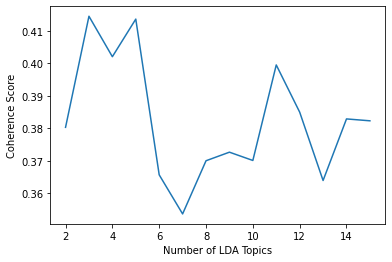

In [31]:
coherences = []


for num_topics in range(2, 16):
    lda = create_model('lda', num_topics=num_topics)
    lda_results = assign_model(lda)
    cm = CoherenceModel(model=lda,
                        texts=lda_results['text'].map(str.split).tolist(),
                        dictionary=lda.id2word,
                        )
    coherences.append(cm.get_coherence())
    
    
#   Plot Coherences
plt.plot(range(2, 16), coherences)
plt.xlabel('Number of LDA Topics')
plt.ylabel('Coherence Score')
 

`We can see there are local maximums at 4, 5, and 12 topics, with 3 as the global
maximum. However, we may want to explore even larger numbers of topics to make
sure the coherence scores don't continue to increase. Sometimes metrics for topic
models can continue increasing as we increase the number of topics, and it helps
to pick a local maximum or "elbow" from plot such as 3 in the coherence plot above.`

## Text Classification

Classification is often used with text. For example, bank transactions can be
categorized for automatic budgeting. We can also categorize social media posts
for a number of purposes, like flagging offensive content. Another example is
categorizing emails as spam or not spam. Many machine learning algorithms can
be used for this, with some of the highest performing algorithms being neural
networks. However, properly using neural networks with text is difficult, and there
are entire books dedicated to it (such as Deep Learning for Natural Language Processing
by Karthiek Reddy Bokka, Shubhangi Hora, Tanuj Jain, and Monicah Wambugu
from Packt). We can also use the simpler algorithms we learned before, like logistic
regression, Naïve Bayes, and KNN.

In [33]:
# First, we load the train and test sets from the 20 newsgroups dataset.
newsgroups_train = fetch_20newsgroups(remove=('headers', 'footers'))

newsgroups_test = fetch_20newsgroups(subset='test', remove=('headers', 'footers'))


en_large = spacy.load('en_core_web_lg', disable=['parser', 'ner'])


# create a function to get the document vectors using the large English model from spaCy

def get_document_vectors(text):
    processed = en_large(text)
    return processed.vector


# create DataFrames from the newsgroups data using the text from each post and
# its label
ng_train_df = pd.DataFrame({'text': newsgroups_train['data'],
                            'label': newsgroups_train['target']})


# We then apply the get_document_vectors function to our text in parallel with swifter
ng_train_doc_vectors = pd.DataFrame(
                                    np.vstack(ng_train_df['text'].swifter.apply(get_document_vectors).tolist())
                                )


ng_test_df = pd.DataFrame({'text': newsgroups_test['data'],
                            'label': newsgroups_test['target']})


ng_test_doc_vectors = pd.DataFrame(
                                    np.vstack(ng_test_df['text'].swifter.apply(get_document_vectors).tolist())
                                    )

# create a single pandas DataFrame with our vectors and labels
ng_train_vector_df = pd.concat([ng_train_df['label'].astype('category'), ng_train_doc_vectors], axis=1)

ng_test_vector_df = pd.concat([ng_test_df['label'].astype('category'), ng_test_doc_vectors], axis=1)

Pandas Apply:   0%|          | 0/11314 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/7532 [00:00<?, ?it/s]

In [34]:
# Create TFIDF Features

vectorizer = TfidfVectorizer(min_df=10, max_df=0.9)

train_tfidf = vectorizer.fit_transform(newsgroups_train['data'])

test_tfidf = vectorizer.transform(newsgroups_test['data'])

train_tfidf_df = pd.DataFrame(train_tfidf.todense())

test_tfidf_df = pd.DataFrame(test_tfidf.todense())

train_tfidf_df['label'] = pd.Series(newsgroups_train['target']).astype('category')

test_tfidf_df['label'] = pd.Series(newsgroups_test['target']).astype('category')

First, we initialize our TFIDF vectorizer with some limitations to decrease the
number of words in the vocabulary (using the min and max document frequencies,
min_df and max_df). Then we use it to fit and transform the training data and to
transform the test data. This makes sure we use the same vocabulary on the train and
test sets, which means we have the same number of features in train and test sets.
If there are new words in the test set, they will not be included in our features since
they were not in the original vocabulary. This is one disadvantage of TFIDF over
word vectors. Another disadvantage is the size of the features.


The shape of the TFIDF training set is (11314, 13269) compared with (11314, 300)
for the word vectors. Fewer features that can capture roughly the same information
are generally better, and many of the entries in the TFIDF matrix are zeros.
Performance-wise (especially for computational runtime), it can be better to go with
word or document vectors compared with TFIDF.


Next, we create DataFrames from the TFIDF vectors by converting the sparse
numpy arrays to dense ones. Then we add the label column, again converting it
to a category datatype. Now we can try out some machine learning. We'll stick
with a simple logistic regression model here,

In [35]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

# Train the lr model on the test set
lr.fit(ng_train_vector_df.drop('label', axis=1), ng_train_vector_df['label'])

# Test the model on the Test set
lr.score(ng_test_vector_df.drop('label', axis=1), ng_test_vector_df['label'])

0.6882634094530006

We simply fit the logistic regression model to our docment vectors and evaluate
the accuracy score on the train set, which is around 76%. We can also evaluate the
accuracy on the test set, which turns out to be near 69%. This is not bad given the
no information rate is about 5% since each class represents around 5% of the data.

In [36]:
# Building the lr model on the TFIDF Vectors

lr = LogisticRegression()

lr.fit(train_tfidf_df.drop('label', axis=1), train_tfidf_df['label'])

lr.score(test_tfidf_df.drop('label', axis=1), test_tfidf_df['label'])

0.7683218268720128

This shows more overfitting, since the training score is much higher than the test
score. However, we do see a higher test accuracy than the document vector features.
But, it might not be worth using more than 40 times the number of features for
this performance gain – we would need to weigh the pros and cons of using more
computational power or runtime with higher accuracy. We could also use larger
word vectors and optimize the models to come to a more complete conclusion.
When evaluating classification performance on text, it can also be helpful to look
at precision, recall, and the F1 score.

## Sentiment Analysis

This is the
measurement of the positive or negative sentiment of text. There are similar analyses
that can be done to measure the emotion of text. The way this works is similar to
the last section – we create features from our text, then train a classifier to predict
either sentiment, emotions, or some other class from a list of labels. With sentiment
analysis, we can train a regressor to predict the sentiment if we label our text with
values such as -5 ranging to +5, or we can train a classifier to simply predict positive,
neutral, or negative.


Another method for determining sentiment of text are rule-based algorithms. These
can use lookup dictionaries where words have a sentiment score, and the sentiment
score for a text is added up and averaged to get the overall sentiment. Negation rules
can be applied, such as the word "not" before another word flips its value.


There are a few packages in Python for determining sentiment:
- NLTK (uses a trained Naïve Bayes classifier)
- Textblob (can also be used through spaCy; uses a lookup dictionary with rules)
- VADER (uses a rule-based system, designed for social media)


Of course, we can also train our own classifier for sentiment based on a variety
of free public datasets. There are also several cloud services and APIs that allow
us to send text and get back a sentiment score.

In [37]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer


vader = SentimentIntensityAnalyzer()

def get_sentiment(text):
    return vader.polarity_scores(text.lower())['compound']


ng_train_df['sentiment_score'] = ng_train_df['text'].swifter.apply(get_sentiment)

Pandas Apply:   0%|          | 0/11314 [00:00<?, ?it/s]

First, we import the sentiment analyzer from vaderSentiment and initialize it
with default settings (no arguments). Then, in our function get_sentiment, we
lowercase the text and apply the vaderSentiment polarity_scores function to the
text. This applies the lookup dictionary (the lexicon) and the rules, then returns a
dictionary with negative, neutral, positive, and compound scores. The compound
score is the overall sentiment of the text ranging from -1 (negative) to +1 (positive),
which we use here. Then we simply apply this get_sentiment function to the text
in our DataFrame. It's important to lowercase the text as we did here, as the text
in the lexicon is all lowercase. The vaderSentiment analyzer also handles emojis.
The lexicons are easily viewable on the GitHub repository: https://github.com/cjhutto/vaderSentiment/blob/master/vaderSentiment/vader_lexicon.txt. We can
see from the lexicon it looks like most words are not lemmatized, so we probably
don't want to carry out lemmatization. We also don't need to worry about removing
punctuation or stop words, since anything not in the lexicon is ignored by the
algorithm.

In [38]:
# results of sentiment analysis

label_dict = {i: label for i, label in enumerate(newsgroups_train['target_names'])}

ng_train_df['label'].replace(label_dict, inplace=True)


# Now view the average sentiment score for each category

ng_train_df.groupby('label').mean().sort_values(by='sentiment_score', ascending=False)

,sentiment_score
label,
comp.graphics,0.547356
misc.forsale,0.493030
rec.sport.hockey,0.470409
rec.sport.baseball,0.469508
sci.electronics,0.431782
comp.sys.ibm.pc.hardware,0.430881
sci.space,0.424613
soc.religion.christian,0.395767
comp.os.ms-windows.misc,0.394298


We can see newsgroups related to electronics, sports, and some others have
relatively high average sentiments, while the guns and Mideast forums are quite
negative. We can examine a few random posts from these to see what makes them so
positive or negative by filtering our DataFrame to get very positive or negative posts.
We can do this with:

In [40]:
ng_train_df[(ng_train_df['label'] == 'talk.politics.guns') & (ng_train_df['sentiment_score'] < -0.5)].sample(2, random_state=42)['text'].tolist()

['I was shocked to see that the subject of my last rely to awesley was\n"Luser!"  That was certainly not my intention.  I meant to leave the\nsubject line unchanged.  I believe that the NNTP server I use at columbia\nmust have put in that subject line in protest over problems with my header.\n That was rather rude of them, but beggars can\'t be choosers, I suppose.\n\nIn any case, I didn\'t do it and I apologize to awesley for the apparent\ninsult.',
 "In article <C4tM1H.ECF@magpie.linknet.com>, manes@magpie.linknet.com (Steve Manes) writes:\n>\n>For chrissakes, take out your calculator and work out the numbers.\n>Here... I've preformatted them for you to make it easier:\n>\n>\t\t\thandgun homicides/population\n>\t\t\t----------------------------\n>\tSwitzerland :\t24 /  6,350,000\n>\t         UK :    8 / 55,670,000\n>\n>.... and then tell me again how Switzerland is safer with a more\n>liberal handgun law than the UK is without...by RATE or TOTAL NUMBER.\n>Your choice.\n\nPlease, PAY 

to easily look at a few of the posts, and remove.tolist() if we want to see the
sentiment scores as well. We can see in the guns forum the words "kill" and "ban"
come up frequently, and many of the posts are indeed negative. In the computer
graphics forum, many of the posts are questions and use words like "good" and
"easy," which result in positive sentiment scores. However, this may be a bit of a
misclassification since these words aren't being used to construe positive sentiment
(for example, the sentence "Is it good?" comes out as highly sentiment positive). So,
when using sentiment analysis, it's a good idea to check some of the positive and
negative text examples and check that they make sense.

<AxesSubplot:xlabel='sentiment_score', ylabel='Count'>

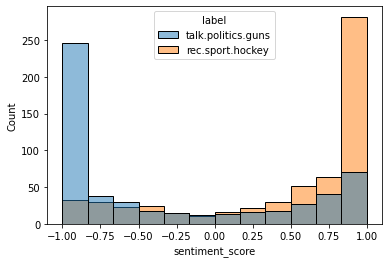

In [45]:
# Distribution of sentiments

import seaborn as sns


guns_hockey_df = ng_train_df.loc[ng_train_df['label'].isin(['talk.politics.guns', 'rec.sport.hockey'])]

sns.histplot(guns_hockey_df, x='sentiment_score', hue='label')

In this case, it seems there are lots of -1 scores for the guns forum and +1 scores
for the hockey forum. In the textblob package (another package we can use for
sentiment analysis, similar to the vaderSentiment package), we will often see many
neutral posts with a score of 0. Looking at the distribution of sentiments like this can
be helpful for understanding the performance of our sentiment analysis.